In [1]:
import os
import math
import obspy
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
from scipy.optimize import curve_fit
from datetime import timedelta
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

from earthquake import Earthquake
import util
import pandas as pd

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/'

eq_list = os.listdir(root)

In [3]:
client = Client("IRIS")
# cat = client.get_events(starttime=UTCDateTime("2019-01-01"), endtime=UTCDateTime("2020-01-01"), minmagnitude=5, includearrivals=True)
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3_catalog.xml')

In [4]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files') and os.path.exists(root+eq_name+'/picks.pkl'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [5]:
from obspy.clients.iris import Client
client = Client()

In [6]:
from obspy.geodetics import FlinnEngdahl
flinn_engdahl = FlinnEngdahl()
flinn_engdahl.get_region(11.8, 48.35)  # returns 'GERMANY'

'GERMANY'

In [7]:
d = {}
for i in range(0,760):
    d[i] = []
for event in cat:
    fe = client.flinnengdahl(lat=event.origins[0].latitude, lon=event.origins[0].longitude, rtype="code")
    depths = d[fe]
    depths.append(event.origins[0].depth/1000)
    d[fe] = depths

URLError: <urlopen error timed out>

/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/earthquakes1/software/Ubuntu/anaconda3/envs/rlc/lib/python3.10/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


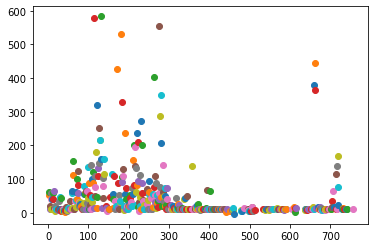

In [8]:
a = {}
for i in range(0,750):
    a[i] = []
for r in d:
    a[r] = np.average(d[r])
    plt.scatter(r, a[r])

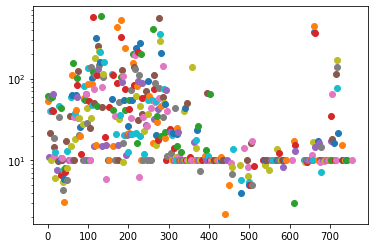

In [9]:
for r in a:
    plt.scatter(r, a[r])
plt.yscale('log')

In [10]:
cat_deep_region = obspy.core.event.Catalog(None)
cat_shallow_region = obspy.core.event.Catalog(None)

In [11]:
lat, lon, region, ave_depth = [], [], [], []
for event in cat_with_data:
    try:
        fe = client.flinnengdahl(lat=event.origins[0].latitude, lon=event.origins[0].longitude, rtype="code")
        lat.append(event.origins[0].latitude)
        lon.append(event.origins[0].longitude)
        region.append(fe)
        ave_depth.append(a[fe])
        if a[fe] > 20:
            cat_deep_region.append(event)
        else:
            cat_shallow_region.append(event)
    except:
        continue

In [12]:
cat_deep_region

3670 Event(s) in Catalog:
2019-01-31T19:49:49.660000Z | -20.486,  -69.016 | 4.2  mb
2019-01-31T13:09:53.370000Z |  +8.978,  -83.758 | 4.9  Mwr
...
2019-11-01T02:32:42.580000Z |  -8.549, +147.483 | 4.7  mb
2019-11-01T00:17:21.991000Z | -22.577,  -66.046 | 4.3  mb
To see all events call 'print(CatalogObject.__str__(print_all=True))'

In [13]:
d = [1 if i >= 20 else i/100 for i in ave_depth]

In [14]:
%matplotlib qt
data = plt.scatter(lon, lat, c=d, cmap = 'viridis', alpha = 0.5)
plt.colorbar(data)